## Match 1

In [13]:
import json

with open("match_1.json", "r") as file:
    match_data_1 = json.load(file)

# Check the type of the loaded data and get the number of gaits (entries) in the dataset
data_type = type(match_data_1)
num_gaits = len(match_data_1)

data_type, num_gaits

(list, 574)

In [43]:
import pandas as pd
df1 = pd.DataFrame(data)

In [44]:
df1

,label,norm
0,walk,"[23.177037336396975, 23.36152528524938, 21.535..."
1,walk,"[20.998214383911275, 19.182798059840767, 18.27..."
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554..."
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787..."
4,rest,"[22.069263037713093, 19.672270483203395, 19.88..."
...,...,...
1182,walk,"[23.337305769963503, 20.210987911153104, 25.06..."
1183,walk,"[22.470322813933603, 22.552427730975246, 23.84..."
1184,walk,"[43.833612705797144, 46.18045998580312, 37.492..."
1185,walk,"[30.927599255773355, 31.26358258808756, 28.286..."


In [45]:
df1.isnull().sum()

label    0
norm     0
dtype: int64

In [47]:
df1['label'].value_counts()

run          552
walk         435
dribble       78
rest          35
pass          32
tackle        31
shot          18
cross          4
no action      2
Name: label, dtype: int64

action distribution

<Axes: title={'center': 'Plotting records by norm type'}>

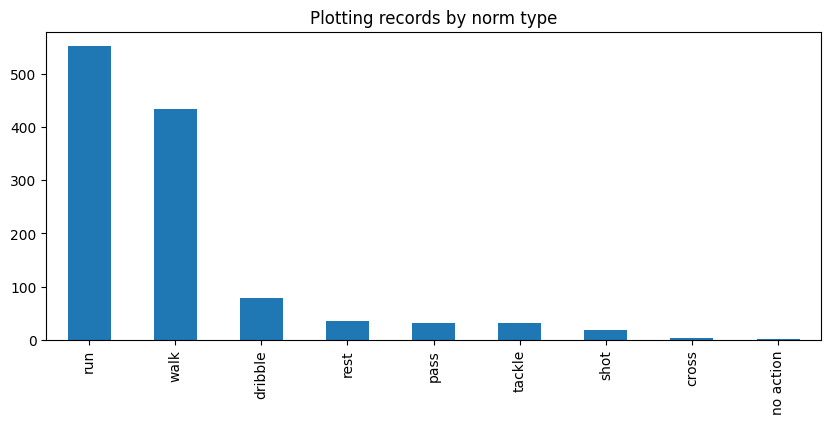

In [48]:
df1['label'].value_counts().plot(kind='bar', title='Plotting records by norm type', figsize=(10, 4),align='center')

# Comparison of Acceleration Data for  the different Actions

1.Driblle

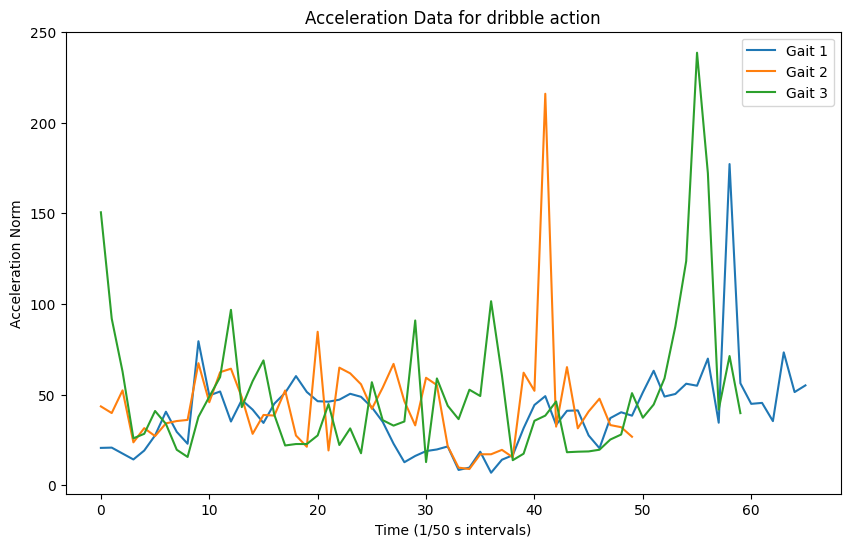

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot acceleration data for the 'dribble' action
def plot_dribble_action(data):
    plt.figure(figsize=(10, 6))
    for i, gait in enumerate(data):
        plt.plot(gait['norm'], label=f"Gait {i+1}")

    plt.title("Acceleration Data for dribble action")
    plt.xlabel("Time (1/50 s intervals)")
    plt.ylabel("Acceleration Norm")
    plt.legend()
    plt.show()

# Filter gaits for the 'dribble' action
dribble_gaits = [gait for gait in match_data_1 if gait['label'] == 'dribble']

# Randomly select 3 sample gaits for the 'dribble' action
sample_dribble_gaits = np.random.choice(dribble_gaits, 3, replace=False)

# Create and display the plot for the 'dribble' action
plot_dribble_action(sample_dribble_gaits)


2.tackle

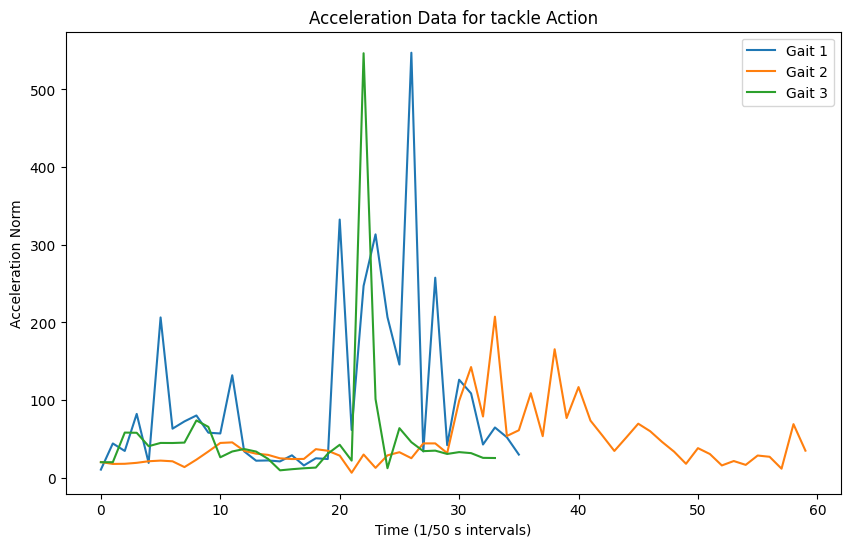

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot acceleration data for the 'tackle' action
def plot_tackle_action(data):
    plt.figure(figsize=(10, 6))
    for i, gait in enumerate(data):
        plt.plot(gait['norm'], label=f"Gait {i+1}")

    plt.title("Acceleration Data for tackle Action")
    plt.xlabel("Time (1/50 s intervals)")
    plt.ylabel("Acceleration Norm")
    plt.legend()
    plt.show()

# Filter gaits for the 'tackle' action
tackle_gaits = [gait for gait in match_data_1 if gait['label'] == 'tackle']

# Randomly select 3 sample gaits for the 'tackle' action
sample_tackle_gaits = np.random.choice(tackle_gaits, 3, replace=False)

# Create and display the plot for the 'tackle' action
plot_tackle_action(sample_tackle_gaits)


3.walk

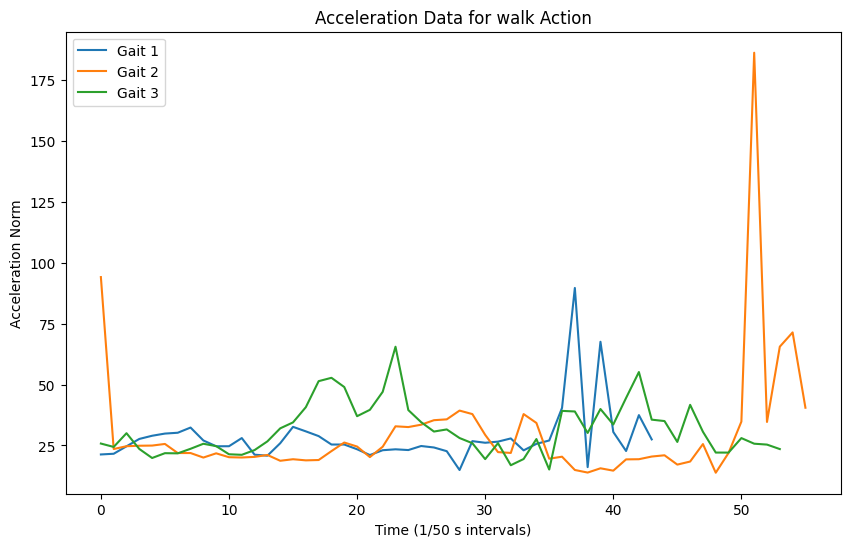

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot acceleration data for the 'walk' action
def plot_walk_action(data):
    plt.figure(figsize=(10, 6))
    for i, gait in enumerate(data):
        plt.plot(gait['norm'], label=f"Gait {i+1}")

    plt.title("Acceleration Data for walk Action")
    plt.xlabel("Time (1/50 s intervals)")
    plt.ylabel("Acceleration Norm")
    plt.legend()
    plt.show()

# Filter gaits for the 'dribble' action
walk_gaits = [gait for gait in match_data_1 if gait['label'] == 'walk']

# Randomly select 3 sample gaits for the 'walk' action
sample_walk_gaits = np.random.choice(walk_gaits, 3, replace=False)

# Create and display the plot for the 'walk' action
plot_walk_action(sample_walk_gaits)


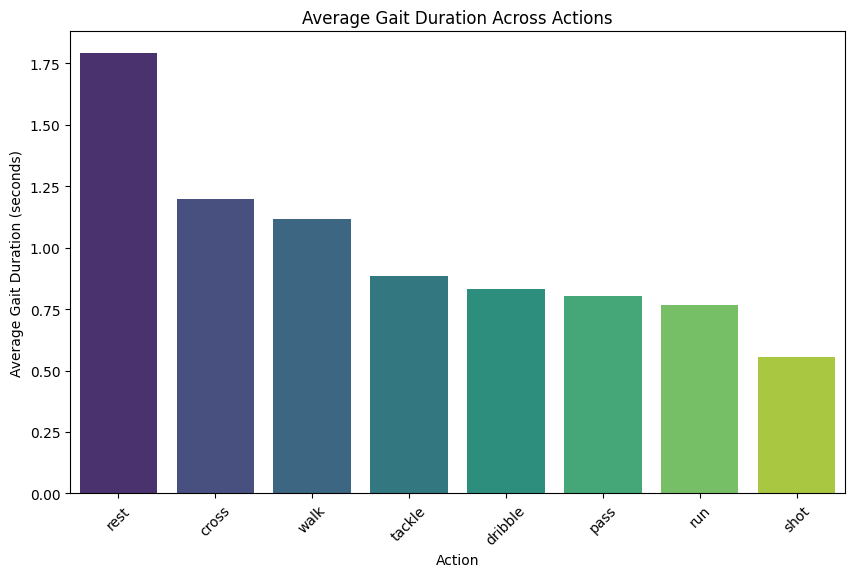

In [35]:
import pandas as pd

# Calculate the duration of each gait
df1['gait_duration'] = df1['norm'].apply(lambda x: len(x) / 50)

# Calculate average gait duration for each action
average_durations = df1.groupby('label')['gait_duration'].mean().reset_index()

# Sort the actions by average duration
average_durations = average_durations.sort_values(by='gait_duration', ascending=False)

# Create a bar plot to visualize the average gait duration for each action
plt.figure(figsize=(10, 6))
sns.barplot(data=average_durations, x='label', y='gait_duration', palette='viridis')
plt.title('Average Gait Duration Across Actions')
plt.xlabel('Action')
plt.ylabel('Average Gait Duration (seconds)')
plt.xticks(rotation=45)
plt.show()



the players have short average gait durations (1.75seconds)

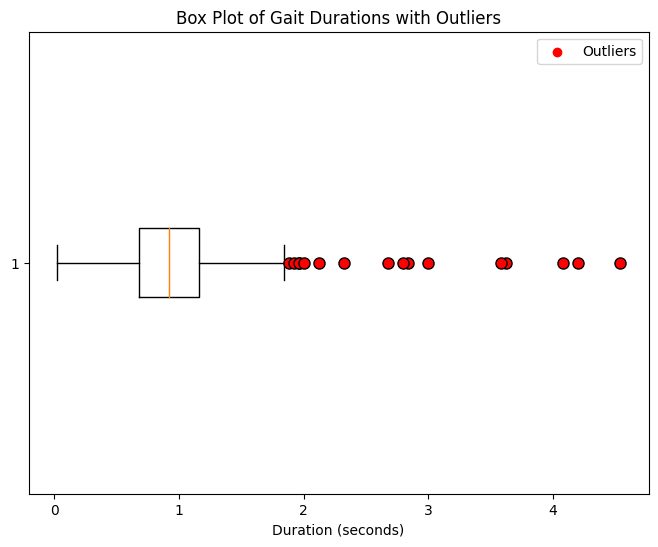

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the quartiles and IQR
Q1 = np.percentile(gait_durations, 25)
Q3 = np.percentile(gait_durations, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [duration for duration in gait_durations if duration < lower_bound or duration > upper_bound]

# Create a box plot with outliers
plt.figure(figsize=(8, 6))
plt.boxplot(gait_durations, vert=False, showfliers=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))

# Highlight outliers in red
plt.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')

# Set labels and title
plt.xlabel('Duration (seconds)')
plt.title('Box Plot of Gait Durations with Outliers')

plt.legend()
plt.show()



## Match 2

In [21]:
import json

with open("match_2.json", "r") as file:
    match_data_2 = json.load(file)

# Check the type of the loaded data and get the number of gaits (entries) in the dataset
data_type = type(match_data_2)
num_gaits = len(match_data_2)

data_type, num_gaits

(list, 613)

Comparison of Acceleration Data for some Actions


**cross**

In [59]:
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

# Function to plot two sample gaits for each action in the same plot
def plot_combined_gaits_plotly(action):
    # Filter gaits for the specified action
    action_gaits = [gait for gait in match_data_2 if gait['label'] == action]

    # Randomly select n sample gaits
    sample_gaits = np.random.choice(action_gaits, 3, replace=False)

    # Create plot
    fig = go.Figure()

    for i, gait in enumerate(sample_gaits):
        fig.add_trace(
            go.Scatter(y=gait['norm'], mode='lines', name=f"Gait {i+1}")
        )

    # Update layout
    fig.update_layout(height=400, width=900, title_text=f"{action} Gaits")
    fig.update_xaxes(title_text="Time (1/50 s intervals)")
    fig.update_yaxes(title_text="Acceleration Norm")

    return fig

actions_to_plot = ['rest', 'walk', 'run', 'dribble', 'tackle', 'pass',
                   #'cross',
                   'shot']

# Plot two sample gaits for different actions in the same plot using Plotly
combined_plots = [plot_combined_gaits_plotly(action) for action in actions_to_plot]

In [60]:
for i in range(len(combined_plots)):
    combined_plots[i].show()

**gait duration for each action**

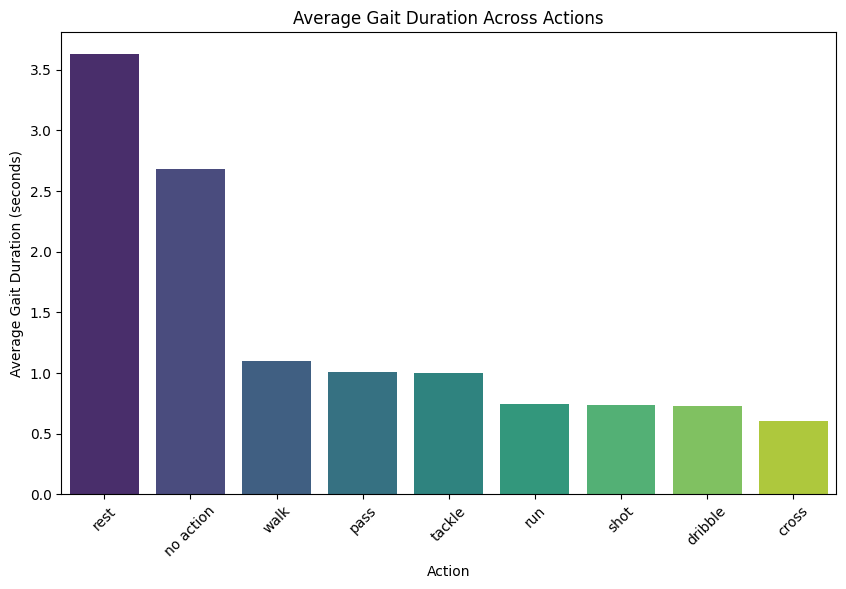

In [37]:
import pandas as pd

# Calculate the duration of each gait
df2['gait_duration'] = df2['norm'].apply(lambda x: len(x) / 50)

# Calculate average gait duration for each action
average_durations = df2.groupby('label')['gait_duration'].mean().reset_index()

# Sort the actions by average duration
average_durations = average_durations.sort_values(by='gait_duration', ascending=False)

# Create a bar plot to visualize the average gait duration for each action
plt.figure(figsize=(10, 6))
sns.barplot(data=average_durations, x='label', y='gait_duration', palette='viridis')
plt.title('Average Gait Duration Across Actions')
plt.xlabel('Action')
plt.ylabel('Average Gait Duration (seconds)')
plt.xticks(rotation=45)
plt.show()


Match 2: In this match, the players tend to perform actions with a longer duration on average (3.5 seconds)

## merge datasets


In [22]:
import pandas as pd
df2 = pd.read_json('match_2.json')

In [23]:
import pandas as pd
df1 = pd.read_json('match_1.json')

In [24]:
merged_df = pd.concat([df1, df2], ignore_index=True)

The distribution of the labels across both games seem to be consistent which might indicate thatt the games had the same intensity and level.

I have decided to extract extra features from the dataset because these features often provide deeper insights into the underlying patterns and relationships present in the data.

both games are approximatly 9 minutes long. (or 9 min snippets from a longer game)

In [28]:
merged_df['mean_acceleration'] = merged_df['norm'].apply(np.mean)
merged_df['max_acceleration'] = merged_df['norm'].apply(np.max)
merged_df['min_acceleration'] = merged_df['norm'].apply(np.min)
merged_df['std_deviation'] = merged_df['norm'].apply(np.std)

In [29]:
merged_df

,label,norm,mean_acceleration,max_acceleration,min_acceleration,std_deviation
0,walk,"[23.177037336396975, 23.361525285249378, 21.53...",24.166958,42.738486,15.392703,5.965416
1,walk,"[20.998214383911275, 19.182798059840767, 18.27...",26.026276,53.767061,15.520896,8.479134
2,walk,"[21.95259682019565, 20.62720484424047, 22.5554...",23.998177,42.105998,14.484489,6.328823
3,walk,"[19.39209748358647, 19.30460665293087, 18.9787...",22.596573,47.934160,14.867721,5.545197
4,rest,"[22.069263037713093, 19.672270483203395, 19.88...",20.378778,22.069263,17.789805,0.739506
...,...,...,...,...,...,...
1182,walk,"[23.337305769963503, 20.210987911153104, 25.06...",29.107628,65.462316,11.190245,10.920141
1183,walk,"[22.470322813933603, 22.552427730975246, 23.84...",26.673605,51.724442,11.657530,8.728731
1184,walk,"[43.833612705797144, 46.18045998580312, 37.492...",28.842287,89.365797,15.539368,12.171922
1185,walk,"[30.927599255773355, 31.26358258808756, 28.286...",25.121496,71.505826,7.309930,9.942930


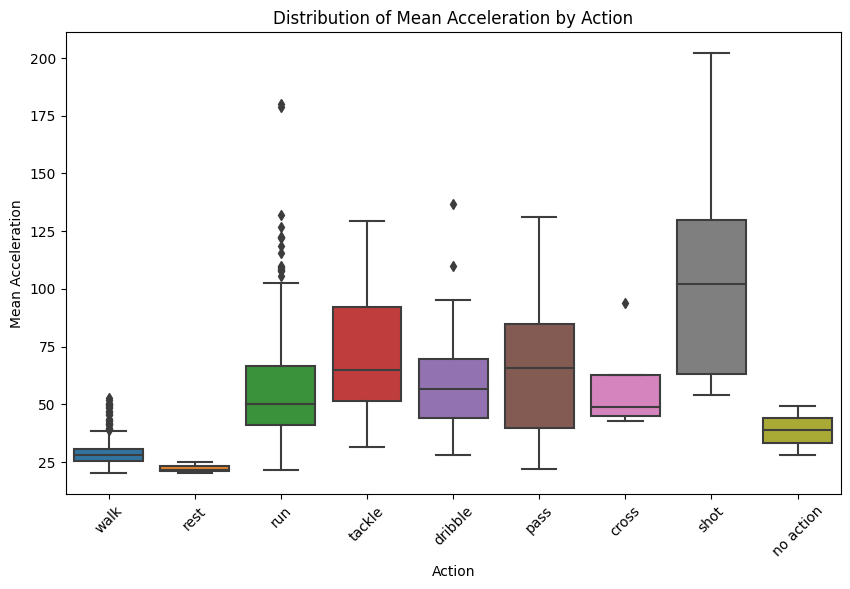

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution of mean acceleration by action
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean_acceleration', data=merged_df)
plt.title("Distribution of Mean Acceleration by Action")
plt.xlabel("Action")
plt.ylabel("Mean Acceleration")
plt.xticks(rotation=45)
plt.show()


A higher mean acceleration for the "shot" action suggests a more intense and dynamic phase of play, likely associated with goal-scoring opportunities and quick, explosive movements by the players

##game generation

In [1]:
import json
import numpy as np


def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

data_1 = read_json('match_1.json')
data_2 = read_json('match_2.json')
data = data_1 + data_2  # Combining the data



In [2]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

sequences = [entry['label'] for entry in data]

label_encoder = LabelEncoder()
encoded_sequences = label_encoder.fit_transform(sequences)

X = encoded_sequences[:-1]
y = encoded_sequences[1:]

y_one_hot = to_categorical(y)

In [7]:

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
X_reshaped = np.reshape(X, (len(X), 1, 1))

model = Sequential()
model.add(LSTM(50, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(Dense(y_one_hot.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_one_hot, test_size=0.2, random_state=0)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
30/30 [==============================] - 5s 24ms/step - loss: 1.9010 - accuracy: 0.3776 - val_loss: 1.7374 - val_accuracy: 0.3445
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 1.5597 - accuracy: 0.3755 - val_loss: 1.4856 - val_accuracy: 0.3445
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 1.3417 - accuracy: 0.4726 - val_loss: 1.3761 - val_accuracy: 0.6639
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 1.2533 - accuracy: 0.6688 - val_loss: 1.3429 - val_accuracy: 0.6765
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 1.2201 - accuracy: 0.6698 - val_loss: 1.3255 - val_accuracy: 0.6765
Epoch 6/100
30/30 [==============================] - 0s 5ms/step - loss: 1.2007 - accuracy: 0.6698 - val_loss: 1.3102 - val_accuracy: 0.6765
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 1.1872 - accuracy: 0.6614 - val_loss: 1.2938 - val_accuracy: 0.6639
Epoch 8/100


Problem Type: LSTM is commonly used for sequence data and time series analysis. In this case, it is used for classification, where you have a sequence of actions or labels and want to predict the next action or label.

Data Preparation: The data is prepared in a specific way to be fed into the LSTM model.
samples refers to the number of data points or sequences.
timesteps refers to the sequence length, which is set to 1 in this code. This means that the model takes one element of the sequence at a time.
features indicates the number of features in each time step. It's also set to 1, indicating that there's only one feature in the input.

Model Architecture:

The LSTM layer is added with 50 units (LSTM cells). The number of units in the LSTM layer is a hyperparameter and can be adjusted for better results.
A Dense layer is added with a softmax activation function.
Compilation:

The model is compiled using the Adam optimizer and
Categorical cross-entropy is used as the loss function,

Training: The model is trained using the training data (X_train and y_train) for 100 epochs with a batch size of 32. The training process aims to minimize the loss function and improve classification accuracy.

Testing: After training, the model's performance can be evaluated using the test data (X_test and y_test) to see how well it generalizes to unseen data.

The main advantage of using LSTM in this context is its ability to capture sequential patterns in the data. LSTM is capable of learning dependencies over longer sequences, which can be crucial for tasks like time series prediction or sequence classification. It's particularly effective when the order and timing of the data points matter

In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Loss: 1.1197
Test Accuracy: 68.07%


sequence generation

In [8]:
def generate_sequence(model, initial_action, num_steps):
    encoded_action = label_encoder.transform([initial_action])
    sequence = []
    for _ in range(num_steps):
        predicted = model.predict(np.reshape(encoded_action, (1, 1, 1)))
        predicted_action_encoded = np.argmax(predicted, axis=1)
        sequence.append(label_encoder.inverse_transform(predicted_action_encoded)[0])
        encoded_action = predicted_action_encoded
    return sequence

In [39]:
# Generate a sequence of actions starting with 'pass' and of length 10
generated_sequence = generate_sequence(model, 'shot', 4)

1/1 [==============================] - 0s 29ms/step


In [40]:
generated_sequence

['run', 'run', 'run', 'run']